<a href="https://colab.research.google.com/github/thfruchart/tnsi/blob/main/11/EXERCICES_Parcourir_Graphes_CORRECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercice 0 : suivi de variables

Effectuer le suivi des variables locales à la fonction `parcours_largeur` lorsqu'on exécute la commande : 

`parcours_largeur(graphex,'H')`    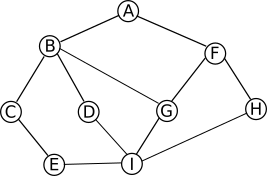



#### code fourni

In [1]:
from queue import Queue

class Graphe:
    ''' graphe représenté par un dictionnaire d'adjacence'''
    def __init__(self):
        self.dico = {}
    
    def ajouter_sommet(self,s):
        if s not in self.dico:
            self.dico[s] = []
    
    def ajouter_arc(self,s1,s2):
        self.ajouter_sommet(s1)
        self.ajouter_sommet(s2)
        self.dico[s1].append(s2)
    
    def ajouter_arete(self,s1,s2):
        self.ajouter_sommet(s1)
        self.ajouter_sommet(s2)
        self.dico[s1].append(s2)
        self.dico[s2].append(s1)
    
    def arc(self,s1,s2):
        return s2 in self.dico[s1]
    
    def sommets(self):
        return list(self.dico)

    def voisins(self,s):
        return self.dico[s]
    
def parcours_largeur(g,depart):
    '''parcours en largeur d'un graphe g depuis un sommet depart
    la fonction renvoie un dictionnaire avec
    - comme clés : les sommets accessibles depuis depart
    - comme valeurs : la distance au sommet depart'''
    dist = {depart:0}
    file = Queue() #file vide
    file.put(depart)
    while not file.empty():
        s = file.get()  #on retire un sommet de la file
        for v in g.voisins(s): 
            if v not in dist:
                #  v (voisin de s) est inscrit dans le dictionnaire
                dist[v] = dist[s] + 1 
                # et on ajoute v dans la file
                file.put(v)
    return dist

graphex = Graphe()
graphex.ajouter_arete('A','B')
graphex.ajouter_arete('A','F')
graphex.ajouter_arete('B','C')
graphex.ajouter_arete('B','D')
graphex.ajouter_arete('B','G')
graphex.ajouter_arete('F','G')
graphex.ajouter_arete('F','H')
graphex.ajouter_arete('C','E')
graphex.ajouter_arete('E','I')
graphex.ajouter_arete('D','I')
graphex.ajouter_arete('G','I')
graphex.ajouter_arete('H','I')

## Exercice 1 : distance entre deux sommets

En utilisant la fonction `parcours_largeur`, écrire une fonction `distance` qui:
* prend en arguments 
   * un graphe `g`
   * et deux sommets `s1`, `s2` du graphe `g`
* renvoie la **distance entre `s1` et `s2`** lorsque `s2` est accessible depuis `s1`
* renvoie `None` sinon.

#### réponse

In [8]:
def distance(g,s1,s2):
    dico = parcours_largeur(g,s1)
    if s2 in dico:
        return dico[s2]
    else :
        return None

print(distance(graphex,'A','I'))

3


## Exercice 2

La méthode proposée dans l'exercice 1 peut être améliorée!

En effet, si on cherche uniquement la distance entre s1 et s2, il est inutile de compléter le dictionnaire donnant la distance entre s1 et **tous** les sommets du graphe... il suffit de s'interrompre dès qu'on arrive à s2!

Ré-écrire la fonction distance, en tenant compte de cette observation.

In [12]:
def distance(g,s1,s2):
    dist = {s1:0}
    file = Queue() #file vide
    file.put(s1)
    while not file.empty():
        s = file.get()  #on retire un sommet de la file
        for v in g.voisins(s): 
            if v not in dist:
                #  v (voisin de s) est inscrit dans le dictionnaire
                dist[v] = dist[s] + 1 
                # et on ajoute v dans la file
                file.put(v)
            if v == s2:
                return dist[s2]
    return 

In [14]:
print(distance(graphex,'A','I'))

3


# Exercice 3 : plus court chemin (nombre d'arêtes)

**1)** En s'inspirant de l'exercice 1, écrire une fonction `optimal_predecesseurs(g,depart)` qui:
* prend en arguments :
   * un graphe `g`
   * un sommet `depart`
* et qui renvoie :
   * un dictionnaire indiquant, pour chaque sommet, le prédécesseur optimal permettant d'atteindre ce sommet en partant de `depart`. 
   * dans ce dictionnaire, la valeur `None` sera associé à la clé `depart`

In [18]:
def optimal_predecesseurs(g,depart):
    '''renvoie un dictionnaire donnant , pour chaque sommet accessible depuis départ
    un prédécesseur optimal depuis ce sommet 'depart'  '''
    predecesseur = {depart:None}
    # pour parcourir avec une variable s : les voisins de depart, 
    # puis les voisins des voisins, etc...
    # on utilise une file
    file = Queue() #file vide
    file.put(depart)
    while not file.empty():
        s = file.get()  #on retire un sommet de la file
        for v in g.voisins(s): 
            if v not in predecesseur:
                #  v (voisin de s) est inscrit dans le dictionnaire
                predecesseur[v] = s
                # et on ajoute v dans la file
                file.put(v)
    return predecesseur

In [19]:
optimal_predecesseurs(graphex,'H')

{'A': 'F',
 'B': 'A',
 'C': 'E',
 'D': 'I',
 'E': 'I',
 'F': 'H',
 'G': 'F',
 'H': None,
 'I': 'H'}

**2)** En déduire une fonction `chemin(g,s1,s2)` qui
* prend en arguments 
   * un graphe `g`
   * et deux sommets `s1`, `s2` du graphe `g`
* renvoie un **plus court chemin entre `s1` et `s2`** lorsque `s2` est accessible depuis `s1`
* renvoie `None` sinon.

In [21]:
def chemin(g,s1,s2):
    '''renvoie un (plus court) chemin entre s1 et s2,
    ou None si s2 n'est pas accessible depuis s1'''
    dico = optimal_predecesseurs(g,s1)
    chemin = [s2]
    # on ajoute les prédecesseurs

    # on remet le chemin dans l'ordre
    chemin.reverse()
    return chemin

chemin(graphex,'H','B')

['B']